<a href="https://colab.research.google.com/github/PPareun/DeepLearningTextBook/blob/main/Keyword_Extractor/Keyword_Ver1/ENG-KWFP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import json
from nltk import sent_tokenize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/MyDrive/KPTimes.train.jsonl')as f:
  data = [json.loads(line) for line in f]

In [ ]:
print(data[0])

{'id': 'ny0282969', 'categories': ['us', 'politics'], 'date': '2016/07/21', 'title': 'For Donald Trump’s Big Speech, an Added Pressure: No Echoes', 'abstract': 'CLEVELAND — Until Monday night, Donald J. Trump’s biggest concern about his convention speech was how much to reveal about himself and his family in an address that is often the most personal one a presidential candidate delivers. But the political firestorm over his wife’s speech , which borrowed passages from Michelle Obama’s convention remarks in 2008, raised the stakes exponentially. Mr. Trump’s speech on Thursday night cannot merely be his best ever. It also has to be bulletproof. By Tuesday morning, word had spread throughout his campaign that any language in Mr. Trump’s address even loosely inspired by speeches, essays, books or Twitter posts had to be either rewritten or attributed. Mr. Trump’s chief speechwriter, Stephen Miller, reassured colleagues that the acceptance speech was wholly original, according to two staff

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
conj = {'for':1 ,'and':1,'nor':1,'but':1,'or':1,'yet':1,'so':1, 'of':1, 'the':1, '-':1, "'s":1, 'is':1, "it":1, "an":1, "a" : 1, "at" : 1}

In [ ]:
tokenizer = Tokenizer(num_words = 100, lower = True, oov_token='<UNK>')

In [ ]:
import re
pos_of_key = []
imp_sent_list = []
for j in range(5000):
  if j%10 == 0:
    print("Process => %d / %d" %(j,5000))
  keywords_list = re.split('[ |,|;]', data[j]['keyword'])
  keyword = {}
  for word in keywords_list:
    if word.lower() not in conj:
      keyword[word.lower()] = 1
  sent_list = sent_tokenize(data[j]['abstract'])
  for sent in sent_list:
    flag = 0
    word_tokenize = text_to_word_sequence(sent,lower = True)
    for index, word in enumerate(word_tokenize):
      if nltk.pos_tag([word])[0][1][0] == 'N':
        key = [0 for _ in range(len(word_tokenize))]
        if word in keyword:
          key[index] = 1
          pos_of_key.append(key)
          imp_sent_list.append(word_tokenize)
        else: 
          pos_of_key.append(key)
          imp_sent_list.append(word_tokenize)
tokenizer.fit_on_texts(imp_sent_list)

Process => 0 / 5000
Process => 10 / 5000
Process => 20 / 5000
Process => 30 / 5000
Process => 40 / 5000
Process => 50 / 5000
Process => 60 / 5000
Process => 70 / 5000
Process => 80 / 5000
Process => 90 / 5000
Process => 100 / 5000
Process => 110 / 5000
Process => 120 / 5000
Process => 130 / 5000
Process => 140 / 5000
Process => 150 / 5000
Process => 160 / 5000
Process => 170 / 5000
Process => 180 / 5000
Process => 190 / 5000
Process => 200 / 5000
Process => 210 / 5000
Process => 220 / 5000
Process => 230 / 5000
Process => 240 / 5000
Process => 250 / 5000
Process => 260 / 5000
Process => 270 / 5000
Process => 280 / 5000
Process => 290 / 5000
Process => 300 / 5000
Process => 310 / 5000
Process => 320 / 5000
Process => 330 / 5000
Process => 340 / 5000
Process => 350 / 5000
Process => 360 / 5000
Process => 370 / 5000
Process => 380 / 5000
Process => 390 / 5000
Process => 400 / 5000
Process => 410 / 5000
Process => 420 / 5000
Process => 430 / 5000
Process => 440 / 5000
Process => 450 / 5000

In [ ]:
for i, pos in enumerate(pos_of_key[:10000]):
  for j in pos:
    if j == 1:
      print(imp_sent_list[i][j])

—
—
the
tuesday
miller
so
month
stephen
damon
damon
get
get
get
or
or
rollins
have
have
have
have
have
have
was
my
may
still
manafort
has
speech
his
has
thought
were
whose
whose
silver
star
get
get
get
rangers
troubling
were
can’t
can’t
can’t
rangers
then
the
white
white
is
romney
romney
his
his
public
job
the
the
a
influence
influence
almost
the
the
the
24
off
it’s
their
can’t
hard
described
said
said
added
said
said
spent
youngest
mozgov
mozgov
was
never
said
looking
he
he
mozgov
his
do
do
classic
classic
spencer
spencer
spencer
spencer
spencer
spencer
spencer
spencer
spencer
spencer
spencer
spencer
marengo
marengo
marengo
spencer
spencer
spencer’s
70
only
experience
experience
for
for
day
day
m
n
n
n
90
90
90
ninth
race
pascrell
mr
the
we
closest
november
demographics
bergen
analysts
strategy
is
is
pascrell
than
than
than
caused
caused
party’s
party’s
pascrell
pascrell
rothman
rothman
argued
the
criticized
criticized
pulaski
pulaski
meat
activist
activist
website
website
he
he
legal

In [ ]:
import random

In [ ]:
X_data = [[]for _ in range(len(imp_sent_list))]
for index,sent in enumerate(imp_sent_list):
  for jndex,word in enumerate(sent):
    if pos_of_key[index][jndex] == 1:
      X_data[index].append(0)
    elif word in tokenizer.word_index:
      X_data[index].append(tokenizer.word_index[word])
    else:
      X_data[index].append(1)

In [ ]:
y_data = [sum(binaries) for binaries in pos_of_key]
ones, zeros = [], []
for index, k in enumerate(y_data):
  if k == 1:
    ones.append(index)
  else:
    zeros.append(index)
ones.extend(zeros[:len(ones)])
np.random.shuffle(ones)
print(len(X_data))
X_data = [X_data[i] for i in ones]
y_data = [y_data[i] for i in ones]
print(y_data[:100])
max_len = 70
X_data = pad_sequences(X_data, padding='post', maxlen=max_len)
y_data = np.array(y_data)

1573543
[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
print(X_data[:10])

[[    0    11   208   520    21    17  1371   326    59     7  2192    15
      2   647   127    45    21   563    18     2 23601     6    21   426
      2   783   122    68  4356   152    22  1789    10    44   373   127
    109     2  6694 29155  2894  5622     6     2  3407  4198     4   995
   5915    26    41   464     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [13587     0    14     3 14372   107    26    28   845     3  5656   243
      9    16   171    12   100  3755     2   138  2211   624    18    25
     54     4  2892 44113    26    13    12 10530   420   410   648    11
      2   267     5    30    44  6837     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [   20 23847  6290    64   910    68   296  2572   296     5  1994   120
   9358     9  6361  6728     3   390     6  2076  8472    5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Input, Add
from tensorflow.keras.optimizers import Adam
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
hidden_units = 256
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero = True))
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Dense(1, activation=('sigmoid')))
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(X_data[:100000], y_data[:100000], test_size=.2, random_state=777)
history = model.fit(X_train, y_train, batch_size=128, epochs=6, validation_split=0.1)
print(model.summary())

Epoch 1/6
563/563 [==============================] - 195s 335ms/step - loss: 0.5135 - accuracy: 0.7386 - val_loss: 0.3795 - val_accuracy: 0.8317
Epoch 2/6
563/563 [==============================] - 184s 327ms/step - loss: 0.2548 - accuracy: 0.9003 - val_loss: 0.3300 - val_accuracy: 0.8676
Epoch 3/6
563/563 [==============================] - 183s 325ms/step - loss: 0.1678 - accuracy: 0.9370 - val_loss: 0.3380 - val_accuracy: 0.8694
Epoch 4/6
563/563 [==============================] - 184s 326ms/step - loss: 0.1272 - accuracy: 0.9529 - val_loss: 0.3423 - val_accuracy: 0.8775
Epoch 5/6
563/563 [==============================] - 181s 322ms/step - loss: 0.1034 - accuracy: 0.9613 - val_loss: 0.3712 - val_accuracy: 0.8832
Epoch 6/6
563/563 [==============================] - 182s 323ms/step - loss: 0.0866 - accuracy: 0.9668 - val_loss: 0.4011 - val_accuracy: 0.8804
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape 

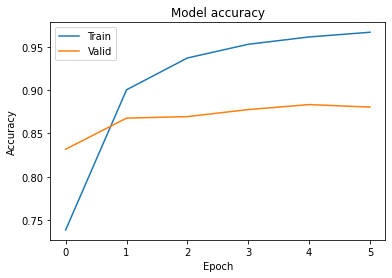

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [ ]:
test_history = model.evaluate(X_test, y_test, batch_size = 128)

157/157 [==============================] - 9s 57ms/step - loss: 0.3925 - accuracy: 0.8830


In [ ]:
print(test_history)

[0.04543613642454147, 0.9919999837875366]


In [ ]:
model.save('/content/drive/MyDrive/KWFP.h5')

In [ ]:
from tensorflow.python.framework.func_graph import save_context
from wordcloud import WordCloud
from collections import Counter
index_word = tokenizer.index_word
def pred(text : str):
  ret_sent_list = []
  sents = sent_tokenize(text)
  keywords = []
  words = []
  texts = []
  for sent in sents:
    ret_sent_list.append(text_to_word_sequence(sent,lower = True))
  for index,sent in enumerate(ret_sent_list):
    count = 0
    for word in sent:
      if nltk.pos_tag([word])[0][1][0] == 'N':
        count += 1
    start = -1
    while(count>0): 
      text_data = []
      flag = False
      for jndex,word in enumerate(sent):
        if nltk.pos_tag([word])[0][1][0] == 'N' and jndex>start and flag == False:
          flag = True
          start = jndex
          text_data.append(1)
          words.append(word)
        elif word in tokenizer.word_index:
          text_data.append(tokenizer.word_index[word])
        else:
          text_data.append(1)
      count-=1
      texts.append(text_data)
  texts = pad_sequences(texts, padding='post', maxlen=max_len)
  y_pred = model.predict(texts)
  print(y_pred)
  for i,y in enumerate(y_pred):
    if y>0.5:
      keywords.append(words[i])
  keywords = Counter(keywords)
  print(keywords)
  wc = WordCloud(width=400, height=400, scale=2.0, max_font_size=250)
  gen = wc.generate_from_frequencies(Counter(keywords))
  plt.figure()
  plt.imshow(gen)

17/17 [==============================] - 0s 6ms/step
[[3.79095525e-02]
 [9.08717960e-02]
 [1.04433410e-01]
 [4.89226371e-01]
 [4.85584624e-02]
 [9.08717960e-02]
 [9.54311728e-01]
 [2.65306264e-01]
 [2.43458729e-02]
 [2.27552429e-02]
 [4.27907482e-02]
 [2.30140667e-02]
 [1.05858862e-01]
 [1.77722052e-02]
 [3.08106035e-01]
 [1.23213619e-01]
 [9.99646187e-01]
 [9.97490406e-01]
 [9.88664329e-01]
 [9.96377885e-01]
 [9.92579401e-01]
 [9.97026026e-01]
 [9.98210311e-01]
 [9.87327635e-01]
 [8.96775544e-01]
 [9.36262131e-01]
 [8.94479752e-01]
 [8.58490646e-01]
 [9.33859229e-01]
 [7.65732288e-01]
 [9.71921861e-01]
 [9.50564563e-01]
 [9.56274450e-01]
 [9.98516619e-01]
 [9.12187755e-01]
 [9.79890585e-01]
 [8.75644147e-01]
 [8.79215121e-01]
 [8.90860856e-01]
 [8.18404377e-01]
 [8.08878899e-01]
 [8.08208227e-01]
 [8.62208009e-01]
 [8.34046185e-01]
 [8.63156736e-01]
 [8.60193849e-01]
 [8.17741454e-01]
 [8.27477932e-01]
 [7.94829786e-01]
 [8.09106648e-01]
 [8.31832647e-01]
 [9.02329683e-01]
 [8.9333629

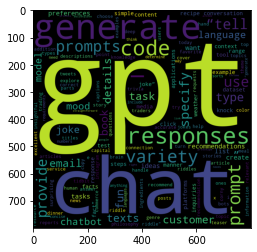

In [ ]:
pred("""

Chat GPT is a variant of the popular language model GPT-3 that is specifically designed for chatbot applications. It is trained on a large dataset of conversational texts, making it well-suited for generating human-like responses to prompts in a chatbot context. In this article, we will explore some of the best prompts to use with Chat GPT to get the most out of this powerful language model.
“Tell me a joke” — Chat GPT is trained on a wide variety of texts, including jokes, so it is well-equipped to generate humorous responses to this prompt. You can even specify a particular type of joke you are in the mood for, such as “Tell me a knock-knock joke” or “Tell me a corny joke.”
“What is your favorite color?” — This is a simple prompt that can help establish a more personal connection with Chat GPT. The model is not capable of actually having preferences, but it can generate a variety of different responses based on the context of the conversation.
“Can you recommend a book for me?” — Chat GPT is trained on a large dataset of book titles and descriptions, so it can generate recommendations based on the genre or type of book you are interested in. Simply specify your preferences and Chat GPT will provide a list of book recommendations.
“Tell me a story” — Chat GPT is capable of generating original stories based on a variety of different prompts. Simply provide a starting point and Chat GPT will take it from there, weaving an engaging narrative that you can follow along with.
“What is the weather like today?” — Chat GPT is trained on a wide variety of texts, including news articles and weather reports, so it can generate realistic responses to this prompt. You can even specify a particular location to get a more accurate forecast.
“What is the meaning of life?” — This is a deep and philosophical prompt that Chat GPT can generate a variety of responses to. The model is trained on a large dataset of texts that cover a wide range of topics, including philosophy, so it can generate thoughtful and insightful responses to this prompt.
“Tell me a riddle” — Chat GPT is trained on a wide variety of riddles and can generate original ones based on a variety of different prompts. Simply specify the type of riddle you are in the mood for and Chat GPT will provide a challenging and entertaining brain teaser.
“What should I make for dinner?” — Chat GPT can provide recipe recommendations based on the ingredients you have on hand or the type of meal you are in the mood for. Simply specify your preferences and Chat GPT will provide a list of ideas for you to choose from.
“What is the capital of X?” — Chat GPT is trained on a wide variety of general knowledge facts and can generate accurate responses to this type of prompt. Simply specify the country or region you are interested in and Chat GPT will provide the correct answer.
“Tell me a fun fact” — Chat GPT is trained on a wide variety of texts, including trivia and fun facts, so it is well-equipped to generate engaging and interesting responses to this prompt. Simply ask Chat GPT to “tell me a fun fact” and it will provide a surprising or amusing tidbit of information.
Copy trading bots from the top traders. Try it for FREE.
As you can see, Chat GPT is capable of generating a wide range of responses to a variety of different prompts. Whether you are looking for a joke, a recipe recommendation, or just a fun conversation, Chat GPT is an excellent resource to turn to.
In addition to generating responses to simple prompts, Chat GPT is also capable of performing more complex tasks. Here are a few examples:
Generating personalized responses to customer inquiries — Chat GPT can be used to create a chatbot that can handle customer inquiries in a personalized and human-like manner. The model can generate responses based on the specific details of the customer’s question or request, making it an effective tool for customer service applications.
Generating content for social media platforms — Chat GPT can be used to generate engaging and relevant content for social media platforms. For example, it can be trained to generate captions for Instagram posts or tweets based on a specific theme or topic.
Generating chatbot responses in real-time — Chat GPT can be used to create chatbots that can generate responses in real-time, providing a seamless and natural conversation experience for users. This can be particularly useful in customer service or e-commerce applications where users may have specific questions or requests.
Generating personalized email responses — Chat GPT can be used to create a chatbot that can generate personalized responses to emails. The model can be trained on a variety of different email types and can generate responses based on the specific details of the email, making it an effective tool for automating email responses in a personalized manner.
One of the more complex parts of Chat GPT is it is capable of creating code for just about anything you can think of.
Creating prompts for Chat GPT to generate code can be a useful way to quickly test ideas, or to generate code for specific tasks. Here are the steps you can follow to create prompts for Chat GPT to generate code:
Determine the programming language you want to use — Chat GPT is trained in a wide variety of programming languages, so you will need to specify which one you want to use for your code.
Identify the task you want Chat GPT to generate code for — Clearly define the task you want Chat GPT to generate code for, including any specific requirements or constraints. For example, you might ask Chat GPT to generate code that sorts a list of numbers in ascending order.
Create a prompt that clearly specifies the task and any requirements — Once you have identified the task and any requirements, create a prompt that clearly specifies what you want Chat GPT to generate code for. For example, you might use a prompt like “Generate code in Python that sorts a list of numbers in ascending order.”
Provide any additional context or details as needed — If you have any specific details or requirements that you want Chat GPT to consider when generating code, include them in the prompt. For example, you might specify the type of input the code should expect or the specific algorithms you want the code to use.
Use the prompt to generate code using Chat GPT — Once you have created a clear and concise prompt, use Chat GPT to generate code based on your prompt. The model will generate a code snippet based on the details you provided, which you can then use as a starting point for further development.
Overall, creating prompts for Chat GPT to generate code is a straightforward process that allows you to quickly prototype and test ideas or generate boilerplate code for specific tasks. By following the steps outlined above, you can use Chat GPT to generate code that is tailored to your specific needs.
Chat GPT is a powerful language model and I think it is just the beginning of what is to come.
If you are interested in checking out Chat GPT then click this link.
If you are interested in getting Chat GPT for Chrome so you can see a chat gpt response right next to your google response then click here.""")

In [ ]:
pred('"""' + input("Paste ur text : ") + '"""')

AttributeError: ignored